In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from cat_embeddings import *

In [3]:
# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Bin petal width into low, medium, high
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
X['petal_width_bin'] = binner.fit_transform(X[['petal width (cm)']]).astype(int)

# Remove original petal width
X_reduced = X.drop(columns=['petal width (cm)'])

# Separate features
bin_column = X_reduced['petal_width_bin'].values
numeric_features = X_reduced.drop(columns=['petal_width_bin']).values
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(numeric_features)


/Users/parameshwaraniyer/Documents/code/ml_cat_embeddings/ml-cat-embeddings/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [4]:
embedding_dims=[1, 2,3,4,5,6,7]
penalties=[0.001, 0.01, 0.05,0.1,0.5]
bounds_abs=[1.0, 2.0,2.5]
objective_fn=min_centroid_distance_with_l2

In [5]:
result = cross_validated_embedding_grid_search(
        X_numeric = scaled_numeric_features,
        bin_column = bin_column,
        y= y,
        embedding_dims= embedding_dims,
        penalties = penalties,
        bounds_abs =bounds_abs,
        objective_fn =objective_fn,
        k = 5
    )

In [6]:
result

{(1, 0.001, 1.0): {'mean_score': np.float64(2.049256737165238),
  'std_score': np.float64(0.0449019928242684),
  'best_score': np.float64(2.0953370407444605),
  'best_embedding': array([[ 2.12816656e-05],
         [ 1.00000000e+00],
         [-1.00000000e+00]])},
 (1, 0.001, 2.0): {'mean_score': np.float64(3.3332998632478192),
  'std_score': np.float64(0.08432376446736671),
  'best_score': np.float64(3.431154290273834),
  'best_embedding': array([[ 0.66578663],
         [-2.        ],
         [ 2.        ]])},
 (1, 0.001, 2.5): {'mean_score': np.float64(3.4875566860112044),
  'std_score': np.float64(0.06255647789828021),
  'best_score': np.float64(3.572279819609003),
  'best_embedding': array([[ 0.58832449],
         [-2.5       ],
         [ 2.39191547]])},
 (1, 0.01, 1.0): {'mean_score': np.float64(2.0312567371671504),
  'std_score': np.float64(0.04490199282243812),
  'best_score': np.float64(2.0773370407448155),
  'best_embedding': array([[ 3.12785295e-06],
         [-1.00000000e+0

In [7]:
result

{(1, 0.001, 1.0): {'mean_score': np.float64(2.049256737165238),
  'std_score': np.float64(0.0449019928242684),
  'best_score': np.float64(2.0953370407444605),
  'best_embedding': array([[ 2.12816656e-05],
         [ 1.00000000e+00],
         [-1.00000000e+00]])},
 (1, 0.001, 2.0): {'mean_score': np.float64(3.3332998632478192),
  'std_score': np.float64(0.08432376446736671),
  'best_score': np.float64(3.431154290273834),
  'best_embedding': array([[ 0.66578663],
         [-2.        ],
         [ 2.        ]])},
 (1, 0.001, 2.5): {'mean_score': np.float64(3.4875566860112044),
  'std_score': np.float64(0.06255647789828021),
  'best_score': np.float64(3.572279819609003),
  'best_embedding': array([[ 0.58832449],
         [-2.5       ],
         [ 2.39191547]])},
 (1, 0.01, 1.0): {'mean_score': np.float64(2.0312567371671504),
  'std_score': np.float64(0.04490199282243812),
  'best_score': np.float64(2.0773370407448155),
  'best_embedding': array([[ 3.12785295e-06],
         [-1.00000000e+0

In [8]:
best_result_per_dim = extract_best_config_and_embedding_per_dim(result)

In [9]:
best_result_per_dim

{1: {'config': (1, 0.001, 2.5),
  'embedding': array([[ 0.58832449],
         [-2.5       ],
         [ 2.39191547]]),
  'score': np.float64(3.572279819609003)},
 2: {'config': (2, 0.001, 2.5),
  'embedding': array([[ 2.5       , -2.5       ],
         [ 1.25971569,  2.5       ],
         [-2.5       , -2.5       ]]),
  'score': np.float64(5.439072710926893)},
 3: {'config': (3, 0.001, 2.5),
  'embedding': array([[ 1.00367648,  2.5       ,  2.5       ],
         [-2.49999134,  1.94175326, -2.5       ],
         [ 2.5       , -2.5       ,  0.29857955]]),
  'score': np.float64(6.260293359968625)},
 4: {'config': (4, 0.001, 2.5),
  'embedding': array([[-0.32026211, -2.26669585,  2.5       , -2.5       ],
         [ 2.5       , -2.4999625 , -2.5       ,  2.5       ],
         [-2.5       ,  2.5       ,  2.5       ,  2.18011658]]),
  'score': np.float64(7.425458265304901)},
 5: {'config': (5, 0.001, 2.5),
  'embedding': array([[ 2.5       ,  2.5       , -2.5       ,  2.5       ,  2.5       

In [10]:
sil_scores = compute_silhouette_per_dim_from_embeddings(best_result_per_dim, scaled_numeric_features, bin_column, y)

In [11]:
sil_scores

{1: 0.5698545632300261,
 2: 0.6666818514087606,
 3: 0.6859362594547374,
 4: 0.7111664955183823,
 5: 0.728766680456365,
 6: 0.7332025783430801,
 7: 0.7412091021210461}

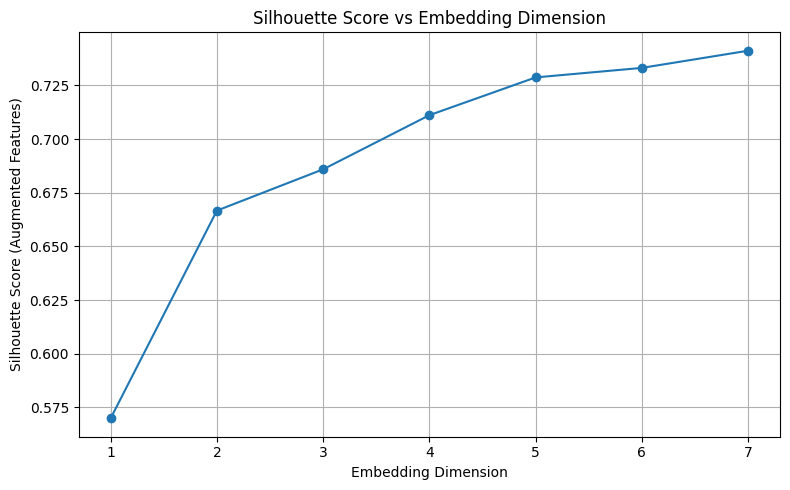

In [12]:
plot_silhouette_scores(sil_scores)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
#from your_module import create_augmented_dataframe  # Your updated version with scale_numeric option


dim = 3
alpha = 0.001
bound_abs = 2.5
silhouette_results = []

iters =1000
for i in range(iters):  # 10 random runs
    # Stratified sample
    X_sample, _, y_sample, _, bin_sample, _ = train_test_split(
        scaled_numeric_features, y, bin_column, train_size=0.6, stratify=y, random_state=i
    )

    # --- Learn optimized embedding on this subset ---
    result = optimize_embedding(
        train_X=X_sample,
        train_y=y_sample,
        train_bin=bin_sample,
        dim=dim,
        alpha=alpha,
        bound_abs=bound_abs,
        objective_fn=min_centroid_distance_with_l2
    )
    embedding = result.x.reshape(3, dim)

    # --- Build augmented dataframe with scaled numeric features + learned embedding ---
    df_augmented = create_augmented_dataframe(
        X_numeric=X_sample,
        bin_column=bin_sample,
        embedding=embedding,
        y=y_sample,
        scale_numeric=True
    )

    X_embed_aug = df_augmented.drop(columns="target").values
    sil_embed = silhouette_score(X_embed_aug, y_sample)

    # --- One-hot version ---
    ohe = OneHotEncoder(sparse_output=False)
    one_hot_emb = ohe.fit_transform(bin_sample.reshape(-1, 1))

    # Concatenate scaled numeric + one-hot
    from sklearn.preprocessing import StandardScaler
    X_scaled = StandardScaler().fit_transform(X_sample)
    X_ohe_aug = np.hstack([X_scaled, one_hot_emb])

    sil_ohe = silhouette_score(X_ohe_aug, y_sample)

    # --- Store results ---
    silhouette_results.append({
        'iteration': i,
        'silhouette_embedding_aug': sil_embed,
        'silhouette_onehot_aug': sil_ohe
    })


In [17]:
silhouette_results

[{'iteration': 0,
  'silhouette_embedding_aug': 0.6742784759416085,
  'silhouette_onehot_aug': 0.4211339928855167},
 {'iteration': 1,
  'silhouette_embedding_aug': 0.6556307134975309,
  'silhouette_onehot_aug': 0.42304043169795214},
 {'iteration': 2,
  'silhouette_embedding_aug': 0.6120728530539473,
  'silhouette_onehot_aug': 0.3789054393504734},
 {'iteration': 3,
  'silhouette_embedding_aug': 0.7401365672196498,
  'silhouette_onehot_aug': 0.44185392921663796},
 {'iteration': 4,
  'silhouette_embedding_aug': 0.6780916528944717,
  'silhouette_onehot_aug': 0.4196992133578018},
 {'iteration': 5,
  'silhouette_embedding_aug': 0.6718560328144476,
  'silhouette_onehot_aug': 0.4281363957947807},
 {'iteration': 6,
  'silhouette_embedding_aug': 0.6855200749510596,
  'silhouette_onehot_aug': 0.44893501520778345},
 {'iteration': 7,
  'silhouette_embedding_aug': 0.6642394045997162,
  'silhouette_onehot_aug': 0.42315978981220864},
 {'iteration': 8,
  'silhouette_embedding_aug': 0.7651355947858496,


In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_silhouette_difference_from_dict(
    silhouette_dict_list: list,
    embedding_key: str = 'silhouette_embedding_aug',
    onehot_key: str = 'silhouette_onehot_aug',
    title: str = "Silhouette Score Difference (Embedding - OneHot)",
    bins: int = 15
):
    """
    Plot histogram of silhouette score differences from a list of dicts.

    Args:
        silhouette_dict_list: List of dicts, each with keys like
            'silhouette_embedding_aug' and 'silhouette_onehot_aug'.
        embedding_key: Key name for embedding-based silhouette score.
        onehot_key: Key name for one-hot silhouette score.
        title: Title of the plot.
        bins: Number of histogram bins.
    """
    silhouette_diffs = [
        entry[embedding_key] - entry[onehot_key]
        for entry in silhouette_dict_list
        if embedding_key in entry and onehot_key in entry
    ]

    mean_diff = np.mean(silhouette_diffs)

    plt.figure(figsize=(8, 5))
    plt.hist(silhouette_diffs, bins=bins, color='skyblue', edgecolor='black')
    plt.axvline(mean_diff, color='red', linestyle='--', label=f"Mean = {mean_diff:.3f}")
    plt.title(title)
    plt.xlabel("Silhouette Score Difference")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return silhouette_diffs  # return list if user wants to save/analyze further


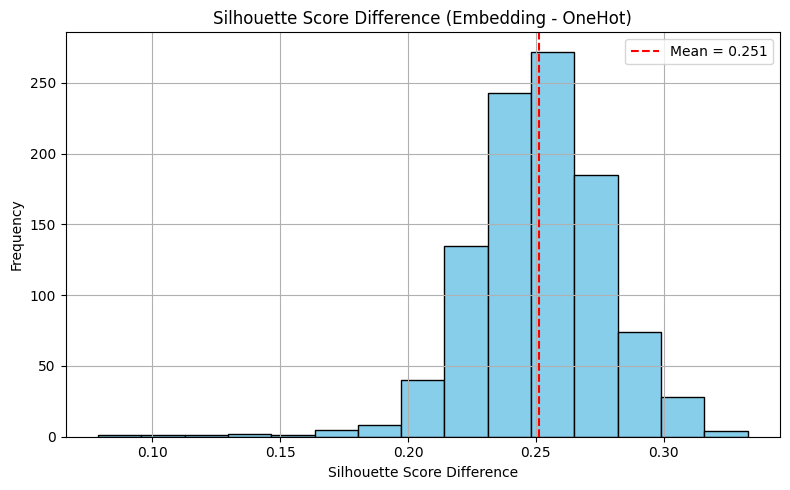

In [20]:
diffs = plot_silhouette_difference_from_dict(silhouette_results)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
#from your_module import create_augmented_dataframe  # Your updated version with scale_numeric option


dim = 4
alpha = 0.001
bound_abs = 2.5
silhouette_results = []

iters =1000
for i in range(iters):  # 10 random runs
    # Stratified sample
    X_sample, _, y_sample, _, bin_sample, _ = train_test_split(
        scaled_numeric_features, y, bin_column, train_size=0.6, stratify=y, random_state=i
    )

    # --- Learn optimized embedding on this subset ---
    result = optimize_embedding(
        train_X=X_sample,
        train_y=y_sample,
        train_bin=bin_sample,
        dim=dim,
        alpha=alpha,
        bound_abs=bound_abs,
        objective_fn=min_centroid_distance_with_l2
    )
    embedding = result.x.reshape(3, dim)

    # --- Build augmented dataframe with scaled numeric features + learned embedding ---
    df_augmented = create_augmented_dataframe(
        X_numeric=X_sample,
        bin_column=bin_sample,
        embedding=embedding,
        y=y_sample,
        scale_numeric=True
    )

    X_embed_aug = df_augmented.drop(columns="target").values
    sil_embed = silhouette_score(X_embed_aug, y_sample)

    # --- One-hot version ---
    ohe = OneHotEncoder(sparse_output=False)
    one_hot_emb = ohe.fit_transform(bin_sample.reshape(-1, 1))

    # Concatenate scaled numeric + one-hot
    from sklearn.preprocessing import StandardScaler
    X_scaled = StandardScaler().fit_transform(X_sample)
    X_ohe_aug = np.hstack([X_scaled, one_hot_emb])

    sil_ohe = silhouette_score(X_ohe_aug, y_sample)

    # --- Store results ---
    silhouette_results.append({
        'iteration': i,
        'silhouette_embedding_aug': sil_embed,
        'silhouette_onehot_aug': sil_ohe
    })


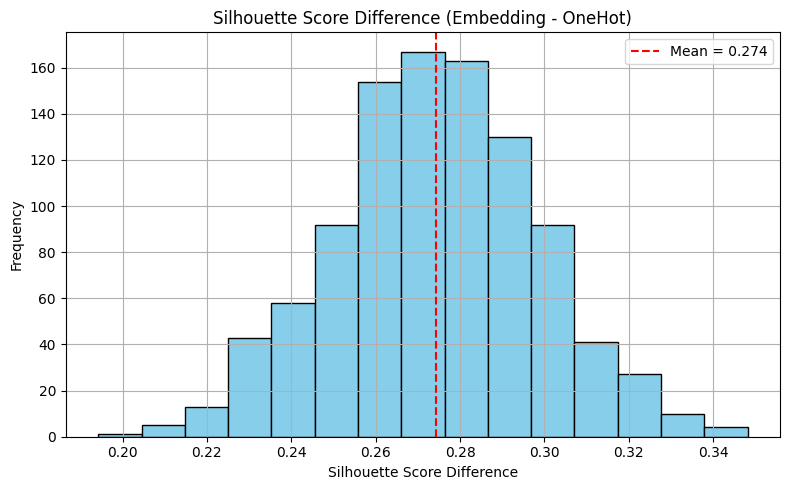

In [23]:
diffs = plot_silhouette_difference_from_dict(silhouette_results)